# Analisis Sentimen Opini Masyarakat terhadap ChatGPT sebagai Aplikasi Natural Language Processing

In [1]:
import pandas as pd

chatgpt_tweets_df = pd.read_csv('dataset/chatgpt_tweets_dataset.csv')
chatgpt_tweets_df.sample(10, random_state=8)

date  \
12283  2023-03-24 08:13:49+00:00   
1986   2023-02-07 16:25:07+00:00   
3974   2022-12-10 12:37:15+00:00   
9641   2023-03-10 16:30:55+00:00   
4517   2023-02-12 15:05:43+00:00   
13155  2023-04-25 13:53:17+00:00   
14568  2022-12-08 20:55:36+00:00   
9872   2023-02-27 16:20:47+00:00   
1157   2023-04-06 08:43:02+00:00   
10830  2023-04-24 21:51:39+00:00   

                                          user_name  \
12283                                          KaEl   
1986                                  Piyush Tiwari   
3974                                    Poonam Soni   
9641                               Stefanescu Liviu   
4517                                BeryBearishBear   
13155  Temerty Centre for AI in Medicine (T-CAIREM)   
14568                                       jhermes   
9872                              Dr. Hilary Murray   
1157                                    AbandonHope   
10830                                  azlef900 ✨👽🌙   

                                                    text sentiment  
12283  #ChatGPT third-Party plugins, the „eyes and ea...   Neutral  
1986   OpenAI: #ChatGPT is the future!\n\nGoogle: hol...   Neutral  
3974   @wahVinci Also there is #ChatGPT now, 👀\nGivin...  Positive  
9641   Social media comments made with #Chatgpt #AI. ...  Negative  
4517   some of leading marijuana companies.... accord...   Neutral  
13155  How #ArtificialIntelligence Like #ChatGPT Is I...  Positive  
14568  Space &amp; Time.\nTuring Test: failed. #ChatG...  Negative  
9872   Excellent panel on #ChatGPT held by our #Trust...  Positive  
1157   surely there should be settings&gt; share data...  Positive  
10830  New youtube series in the works "Deconstructin...  Positive

## Data Preparation and Preprocessing

### Text Filtering and Case Folding

Text filtering adalah proses penghapusan atau modifikasi elemen tertentu dalam data teks dengan tujuan untuk meningkatkan kualitas atau mempersiapkannya untuk analisis lebih lanjut.
Case folding atau normalisasi teks adalah proses yang mengubah teks menjadi format huruf yang konsisten. Dalam case folding, terdapat dua pendekatan yang sering digunakan yaitu lowercasing dan uppercasing. Penggunaan case folding dalam penelitian ini adalah menggunakan lowercasing.

In [2]:
import re
import html

def clean_text(text):
    text = text.lower()
    text = html.unescape(text)  # Remove HTML escape sequences
    text = re.sub(r'[\n\t\r\\]', ' ', text)  # Remove escape sequences
    text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b', '', text) # Remove emails
    text = re.sub('['
                  u'\U0001F600-\U0001F64F'  # Emoticons
                  u'\U0001F300-\U0001F5FF'  # Symbols & pictographs
                  u'\U0001F680-\U0001F6FF'  # Transport & map symbols
                  u'\U0001F1E0-\U0001F1FF'  # Flags (iOS)
                  ']+', '', text)  # Remove emojis
    text = re.sub(r'@\w+', '', text)  # Remove usernames
    text = re.sub(r'#[\w\d]+', '', text)  # Remove hashtags
    text = re.sub(r'\'s', ' is', text)  # Replace possessive forms
    
    # Expand contractions
    contraction_patterns = [
        (r"\bcan't\b", "cannot"),
        (r"\bwon't\b", "will not"),
        (r"\bain't\b", "am not"),
        (r"\bisn't\b", "is not"),
        (r"\baren't\b", "are not"),
        (r"\bwasn't\b", "was not"),
        (r"\bweren't\b", "were not"),
        (r"\bhasn't\b", "has not"),
        (r"\bhaven't\b", "have not"),
        (r"\bhadn't\b", "had not"),
        (r"\bdoesn't\b", "does not"),
        (r"\bdon't\b", "do not"),
        (r"\bdidn't\b", "did not"),
        (r"\bcouldn't\b", "could not"),
        (r"\bshouldn't\b", "should not"),
        (r"\bwouldn't\b", "would not"),
        (r"\bmightn't\b", "might not"),
        (r"\bmustn't\b", "must not"),
        (r"\bshan't\b", "shall not"),
        (r"\bi'm\b", "I am"),
        (r"\byou're\b", "you are"),
        (r"\bhe's\b", "he is"),
        (r"\bshe's\b", "she is"),
    ]

    for pattern, replacement in contraction_patterns:
        text = re.sub(pattern, replacement, text)
    
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
                  r'|www(?:\.[a-zA-Z0-9-]+){2,3}(?:/[a-zA-Z0-9]+)?', '', text)  # Remove links
    text = re.sub(r'[/-]', ' ', text)  # Replace slashes and dashes with spaces
    text = re.sub(r'\$\w*\b', '', text)  # Remove dollar words
    text = re.sub(r'[^\w\s]+', '', text)  # Remove punctuation
    text = re.sub(r'\b\w*\d+\w*\b', '', text)  # Remove words containing digits
    text = re.sub(r'\b(?!i\b)\w\b', ' ', text)  # Remove one-character words (except 'I')
    text = re.sub(r'[\u0900-\u097F\u0980-\u09FF\u0A00-\u0A7F\u0A80-\u0AFF\u0B00-\u0B7F\u0B80-\u0BFF'
                  r'\u0C00-\u0C7F\u0C80-\u0CFF\u0D00-\u0D7F\u0D80-\u0DFF\u0E00-\u0E7F\u0E80-\u0EFF'
                  r'\u0F00-\u0FFF]+', '', text)  # Remove Indian script characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    text = re.sub(r'[\u2000-\u206F\u2E00-\u2E7F\\!"#$%&\'()*+,\-./:;<=>?@\[\]^_`{|}~]', '', text)  # Remove special Unicode characters
    text = re.sub(r'\s{2,}', ' ', text)  # Replace multiple spaces with a single space
    text = text.strip()  # Remove leading and trailing spaces

    return text

chatgpt_tweets_df['filtered_text'] = chatgpt_tweets_df['text'].apply(clean_text)

In [3]:
chatgpt_tweets_df[['text', 'filtered_text']].sample(10, random_state=8)

text  \
12283  #ChatGPT third-Party plugins, the „eyes and ea...   
1986   OpenAI: #ChatGPT is the future!\n\nGoogle: hol...   
3974   @wahVinci Also there is #ChatGPT now, 👀\nGivin...   
9641   Social media comments made with #Chatgpt #AI. ...   
4517   some of leading marijuana companies.... accord...   
13155  How #ArtificialIntelligence Like #ChatGPT Is I...   
14568  Space &amp; Time.\nTuring Test: failed. #ChatG...   
9872   Excellent panel on #ChatGPT held by our #Trust...   
1157   surely there should be settings&gt; share data...   
10830  New youtube series in the works "Deconstructin...   

                                           filtered_text  
12283  third party plugins the eyes and ears for larg...  
1986                 openai is the future google hold my  
3974              also there is now giving code directly  
9641   social media comments made with the future wil...  
4517   some of leading marijuana companies according ...  
13155          how like is influencing medical diagnoses  
14568                      space time turing test failed  
9872   excellent panel on held by our team looking at...  
1157   surely there should be settings share data and...  
10830  new youtube series in the works deconstructing...

### Tokenization

Proses tokenisasi dilakukan dengan menggunakan pustaka NLTK guna membagi setiap tweet menjadi unit-unit yang lebih kecil. Implementasi NLTK memungkinkan pelaksanaan tokenisasi pada setiap tweet secara efisien dan mudah, memungkinkan pemrosesan teks yang lebih lanjut untuk mendapatkan pemahaman yang lebih mendalam mengenai data tweet tersebut.

In [4]:
from nltk.tokenize import word_tokenize

chatgpt_tweets_df['tokenized'] = chatgpt_tweets_df['filtered_text'].apply(
    lambda x: word_tokenize(x))

In [5]:
chatgpt_tweets_df[['text', 'filtered_text', 'tokenized']].sample(10, random_state=8)

text  \
12283  #ChatGPT third-Party plugins, the „eyes and ea...   
1986   OpenAI: #ChatGPT is the future!\n\nGoogle: hol...   
3974   @wahVinci Also there is #ChatGPT now, 👀\nGivin...   
9641   Social media comments made with #Chatgpt #AI. ...   
4517   some of leading marijuana companies.... accord...   
13155  How #ArtificialIntelligence Like #ChatGPT Is I...   
14568  Space &amp; Time.\nTuring Test: failed. #ChatG...   
9872   Excellent panel on #ChatGPT held by our #Trust...   
1157   surely there should be settings&gt; share data...   
10830  New youtube series in the works "Deconstructin...   

                                           filtered_text  \
12283  third party plugins the eyes and ears for larg...   
1986                 openai is the future google hold my   
3974              also there is now giving code directly   
9641   social media comments made with the future wil...   
4517   some of leading marijuana companies according ...   
13155          how like is influencing medical diagnoses   
14568                      space time turing test failed   
9872   excellent panel on held by our team looking at...   
1157   surely there should be settings share data and...   
10830  new youtube series in the works deconstructing...   

                                               tokenized  
12283  [third, party, plugins, the, eyes, and, ears, ...  
1986         [openai, is, the, future, google, hold, my]  
3974      [also, there, is, now, giving, code, directly]  
9641   [social, media, comments, made, with, the, fut...  
4517   [some, of, leading, marijuana, companies, acco...  
13155   [how, like, is, influencing, medical, diagnoses]  
14568                [space, time, turing, test, failed]  
9872   [excellent, panel, on, held, by, our, team, lo...  
1157   [surely, there, should, be, settings, share, d...  
10830  [new, youtube, series, in, the, works, deconst...

### Remove Stopwords

In [6]:
from nltk.corpus import stopwords

chatgpt_tweets_df['removed_stopwords'] = chatgpt_tweets_df['tokenized'].apply(
    lambda x: [word for word in x if word not in stopwords.words('english')])

In [7]:
chatgpt_tweets_df[['text', 'filtered_text', 'tokenized', 'removed_stopwords']].sample(10, random_state=8)

text  \
12283  #ChatGPT third-Party plugins, the „eyes and ea...   
1986   OpenAI: #ChatGPT is the future!\n\nGoogle: hol...   
3974   @wahVinci Also there is #ChatGPT now, 👀\nGivin...   
9641   Social media comments made with #Chatgpt #AI. ...   
4517   some of leading marijuana companies.... accord...   
13155  How #ArtificialIntelligence Like #ChatGPT Is I...   
14568  Space &amp; Time.\nTuring Test: failed. #ChatG...   
9872   Excellent panel on #ChatGPT held by our #Trust...   
1157   surely there should be settings&gt; share data...   
10830  New youtube series in the works "Deconstructin...   

                                           filtered_text  \
12283  third party plugins the eyes and ears for larg...   
1986                 openai is the future google hold my   
3974              also there is now giving code directly   
9641   social media comments made with the future wil...   
4517   some of leading marijuana companies according ...   
13155          how like is influencing medical diagnoses   
14568                      space time turing test failed   
9872   excellent panel on held by our team looking at...   
1157   surely there should be settings share data and...   
10830  new youtube series in the works deconstructing...   

                                               tokenized  \
12283  [third, party, plugins, the, eyes, and, ears, ...   
1986         [openai, is, the, future, google, hold, my]   
3974      [also, there, is, now, giving, code, directly]   
9641   [social, media, comments, made, with, the, fut...   
4517   [some, of, leading, marijuana, companies, acco...   
13155   [how, like, is, influencing, medical, diagnoses]   
14568                [space, time, turing, test, failed]   
9872   [excellent, panel, on, held, by, our, team, lo...   
1157   [surely, there, should, be, settings, share, d...   
10830  [new, youtube, series, in, the, works, deconst...   

                                       removed_stopwords  
12283  [third, party, plugins, eyes, ears, large, lan...  
1986                      [openai, future, google, hold]  
3974                      [also, giving, code, directly]  
9641       [social, media, comments, made, future, spam]  
4517   [leading, marijuana, companies, according, bul...  
13155            [like, influencing, medical, diagnoses]  
14568                [space, time, turing, test, failed]  
9872   [excellent, panel, held, team, looking, data, ...  
1157   [surely, settings, share, data, make, private,...  
10830  [new, youtube, series, works, deconstructing, ...

### Stemming

In [8]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()
chatgpt_tweets_df['stemmed'] = chatgpt_tweets_df['removed_stopwords'].apply(
    lambda x: [ps.stem(word) for word in x])

In [9]:
chatgpt_tweets_df[['text', 'filtered_text', 'tokenized', 'removed_stopwords', 'stemmed']].sample(10, random_state=8)

text  \
12283  #ChatGPT third-Party plugins, the „eyes and ea...   
1986   OpenAI: #ChatGPT is the future!\n\nGoogle: hol...   
3974   @wahVinci Also there is #ChatGPT now, 👀\nGivin...   
9641   Social media comments made with #Chatgpt #AI. ...   
4517   some of leading marijuana companies.... accord...   
13155  How #ArtificialIntelligence Like #ChatGPT Is I...   
14568  Space &amp; Time.\nTuring Test: failed. #ChatG...   
9872   Excellent panel on #ChatGPT held by our #Trust...   
1157   surely there should be settings&gt; share data...   
10830  New youtube series in the works "Deconstructin...   

                                           filtered_text  \
12283  third party plugins the eyes and ears for larg...   
1986                 openai is the future google hold my   
3974              also there is now giving code directly   
9641   social media comments made with the future wil...   
4517   some of leading marijuana companies according ...   
13155          how like is influencing medical diagnoses   
14568                      space time turing test failed   
9872   excellent panel on held by our team looking at...   
1157   surely there should be settings share data and...   
10830  new youtube series in the works deconstructing...   

                                               tokenized  \
12283  [third, party, plugins, the, eyes, and, ears, ...   
1986         [openai, is, the, future, google, hold, my]   
3974      [also, there, is, now, giving, code, directly]   
9641   [social, media, comments, made, with, the, fut...   
4517   [some, of, leading, marijuana, companies, acco...   
13155   [how, like, is, influencing, medical, diagnoses]   
14568                [space, time, turing, test, failed]   
9872   [excellent, panel, on, held, by, our, team, lo...   
1157   [surely, there, should, be, settings, share, d...   
10830  [new, youtube, series, in, the, works, deconst...   

                                       removed_stopwords  \
12283  [third, party, plugins, eyes, ears, large, lan...   
1986                      [openai, future, google, hold]   
3974                      [also, giving, code, directly]   
9641       [social, media, comments, made, future, spam]   
4517   [leading, marijuana, companies, according, bul...   
13155            [like, influencing, medical, diagnoses]   
14568                [space, time, turing, test, failed]   
9872   [excellent, panel, held, team, looking, data, ...   
1157   [surely, settings, share, data, make, private,...   
10830  [new, youtube, series, works, deconstructing, ...   

                                                 stemmed  
12283  [third, parti, plugin, eye, ear, larg, languag...  
1986                        [openai, futur, googl, hold]  
3974                        [also, give, code, directli]  
9641         [social, media, comment, made, futur, spam]  
4517         [lead, marijuana, compani, accord, bullish]  
13155                   [like, influenc, medic, diagnos]  
14568                    [space, time, ture, test, fail]  
9872   [excel, panel, held, team, look, data, futur, ...  
1157        [sure, set, share, data, make, privat, mode]  
10830  [new, youtub, seri, work, deconstruct, scienti...

### Vector Conversion

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=5000)
vectors = vectorizer.fit_transform(chatgpt_tweets_df['stemmed'].apply(
    lambda x: ' '.join(x)))
vectors = [vector.toarray()[0] for vector in vectors]
chatgpt_tweets_df['vectors'] = vectors

In [11]:
import joblib

vectorizer_name = 'vectorizer.joblib'
joblib.dump(vectorizer, vectorizer_name)

['vectorizer.joblib']

In [12]:
chatgpt_tweets_df[['text', 'filtered_text', 'tokenized', 'removed_stopwords', 'stemmed', 'vectors']].sample(10, random_state=8)

text  \
12283  #ChatGPT third-Party plugins, the „eyes and ea...   
1986   OpenAI: #ChatGPT is the future!\n\nGoogle: hol...   
3974   @wahVinci Also there is #ChatGPT now, 👀\nGivin...   
9641   Social media comments made with #Chatgpt #AI. ...   
4517   some of leading marijuana companies.... accord...   
13155  How #ArtificialIntelligence Like #ChatGPT Is I...   
14568  Space &amp; Time.\nTuring Test: failed. #ChatG...   
9872   Excellent panel on #ChatGPT held by our #Trust...   
1157   surely there should be settings&gt; share data...   
10830  New youtube series in the works "Deconstructin...   

                                           filtered_text  \
12283  third party plugins the eyes and ears for larg...   
1986                 openai is the future google hold my   
3974              also there is now giving code directly   
9641   social media comments made with the future wil...   
4517   some of leading marijuana companies according ...   
13155          how like is influencing medical diagnoses   
14568                      space time turing test failed   
9872   excellent panel on held by our team looking at...   
1157   surely there should be settings share data and...   
10830  new youtube series in the works deconstructing...   

                                               tokenized  \
12283  [third, party, plugins, the, eyes, and, ears, ...   
1986         [openai, is, the, future, google, hold, my]   
3974      [also, there, is, now, giving, code, directly]   
9641   [social, media, comments, made, with, the, fut...   
4517   [some, of, leading, marijuana, companies, acco...   
13155   [how, like, is, influencing, medical, diagnoses]   
14568                [space, time, turing, test, failed]   
9872   [excellent, panel, on, held, by, our, team, lo...   
1157   [surely, there, should, be, settings, share, d...   
10830  [new, youtube, series, in, the, works, deconst...   

                                       removed_stopwords  \
12283  [third, party, plugins, eyes, ears, large, lan...   
1986                      [openai, future, google, hold]   
3974                      [also, giving, code, directly]   
9641       [social, media, comments, made, future, spam]   
4517   [leading, marijuana, companies, according, bul...   
13155            [like, influencing, medical, diagnoses]   
14568                [space, time, turing, test, failed]   
9872   [excellent, panel, held, team, looking, data, ...   
1157   [surely, settings, share, data, make, private,...   
10830  [new, youtube, series, works, deconstructing, ...   

                                                 stemmed  \
12283  [third, parti, plugin, eye, ear, larg, languag...   
1986                        [openai, futur, googl, hold]   
3974                        [also, give, code, directli]   
9641         [social, media, comment, made, futur, spam]   
4517         [lead, marijuana, compani, accord, bullish]   
13155                   [like, influenc, medic, diagnos]   
14568                    [space, time, ture, test, fail]   
9872   [excel, panel, held, team, look, data, futur, ...   
1157        [sure, set, share, data, make, privat, mode]   
10830  [new, youtub, seri, work, deconstruct, scienti...   

                                                 vectors  
12283  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1986   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
3974   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
9641   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
4517   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
13155  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
14568  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
9872   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1157   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
10830  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...

## Training

In [13]:
import time
import numpy as np
from sklearn.model_selection import train_test_split

X = np.asarray(vectors)
y = np.asarray(chatgpt_tweets_df['sentiment'].apply(
    lambda x: 0 if x == 'Negative' else 1 if x == 'Neutral' else 2 if x == 'Positive' else x))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15, random_state=8)

print(f'Total data\t\t: {len(X)}')
print(f'Total training data\t: {len(X_train)}')
print(f'Total testing data\t: {len(X_test)}')

Total data		: 15000
Total training data	: 12750
Total testing data	: 2250


### Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(verbose=3, n_jobs=-1, random_state=8)
rf_start = time.time()
rf.fit(X_train, y_train)
rf_stop = time.time()

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   12.3s


building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   48.6s finished


### LightGBM

In [15]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(verbose=0, n_jobs=-1, random_state=8)
lgbm_start = time.time()
lgbm.fit(X_train, y_train)
lgbm_stop = time.time()

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031929 seconds.
You can set `force_col_wise=true` to remove the overhead.


## Evaluasi

In [46]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score

y_pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='macro')
rf_recall = recall_score(y_test, y_pred_rf, average='macro')

y_pred_lgbm = lgbm.predict(X_test)
lgbm_accuracy = accuracy_score(y_test, y_pred_lgbm)
lgbm_precision = precision_score(y_test, y_pred_lgbm, average='macro')
lgbm_recall = recall_score(y_test, y_pred_lgbm, average='macro')

model_table = pd.DataFrame({
    'model': ['Random Forest', 'LightGBM'],
    'accuracy': ['{:.2f}%'.format(rf_accuracy*100), '{:.2f}%'.format(lgbm_accuracy*100)],
    'precision': ['{:.2f}%'.format(rf_precision*100), '{:.2f}%'.format(lgbm_precision*100)],
    'recall': ['{:.2f}%'.format(rf_recall*100), '{:.2f}%'.format(lgbm_recall*100)],
    'training_time': [(rf_stop - rf_start), (lgbm_stop - lgbm_start)]
})
model_table

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


model accuracy precision  recall  training_time
0  Random Forest   78.13%    78.50%  78.32%      48.444148
1       LightGBM   77.11%    77.97%  77.36%       1.235232

## Hyperparameter Tuning

In [18]:
import optuna
from sklearn.model_selection import cross_val_score

def rf_objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 50),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'class_weight': trial.suggest_categorical('class_weight', ['balanced'])
    }

    model = RandomForestClassifier(**params)

    score = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1).mean()

    return score

rf_study = optuna.create_study(direction='maximize')
rf_study.optimize(rf_objective, n_trials=10)

print('Random Forest Hyperparameter Tuning')
print('Best score:', rf_study.best_value)
print('Best hyperparameters:', rf_study.best_params)


[I 2023-06-04 07:13:59,478] A new study created in memory with name: no-name-43ab3626-bc4f-4c10-b906-1ed8d421f0c8
[I 2023-06-04 07:17:09,620] Trial 0 finished with value: 0.6699607843137255 and parameters: {'n_estimators': 820, 'max_depth': 6, 'min_samples_split': 11, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'bootstrap': True, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.6699607843137255.
[I 2023-06-04 07:18:28,782] Trial 1 finished with value: 0.707843137254902 and parameters: {'n_estimators': 429, 'max_depth': 19, 'min_samples_split': 15, 'min_samples_leaf': 11, 'max_features': 'log2', 'bootstrap': False, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.707843137254902.
[I 2023-06-04 07:26:06,317] Trial 2 finished with value: 0.6874509803921569 and parameters: {'n_estimators': 496, 'max_depth': 16, 'min_samples_split': 12, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'bootstrap': False, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.707843

Random Forest Hyperparameter Tuning
Best score: 0.7178823529411764
Best hyperparameters: {'n_estimators': 362, 'max_depth': 28, 'min_samples_split': 4, 'min_samples_leaf': 9, 'max_features': 'log2', 'bootstrap': False, 'class_weight': 'balanced'}


In [31]:
import optuna
from sklearn.model_selection import cross_val_score

def lgbm_objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 75, 500),
        'num_leaves': trial.suggest_int('num_leaves', 28, 50),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1, log=True),
        'subsample': trial.suggest_float('subsample', 0.2, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.2, 1),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.1, 1, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.1, 1, log=True),
        'subsample_for_bin': trial.suggest_int('subsample_for_bin', 1000, 20000),
        'objective': trial.suggest_categorical('objective', ['multiclass']),
        'class_weight': trial.suggest_categorical('class_weight', ['balanced'])
    }

    model = LGBMClassifier(**params)

    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1).mean()
    return score

lgbm_study = optuna.create_study(direction='maximize')
lgbm_study.optimize(lgbm_objective, n_trials=100, n_jobs=-1)

print(f'LightGBM Hyperparameter Tuning')
print(f'Best score\t\t: {lgbm_study.best_value}')
print(f'Best hyperparameters\t: {lgbm_study.best_params}')

[I 2023-06-04 08:22:06,329] A new study created in memory with name: no-name-0d60a6f1-28c5-4720-9764-b78bc112ffe1
[I 2023-06-04 08:22:23,972] Trial 0 finished with value: 0.6661176470588235 and parameters: {'n_estimators': 170, 'num_leaves': 31, 'learning_rate': 0.004673986988226497, 'subsample': 0.7256461652930122, 'colsample_bytree': 0.9921439609248366, 'reg_alpha': 0.35388682855083853, 'reg_lambda': 0.7401140183630869, 'subsample_for_bin': 7143, 'objective': 'multiclass', 'class_weight': 'balanced'}. Best is trial 0 with value: 0.6661176470588235.
[I 2023-06-04 08:22:28,527] Trial 1 finished with value: 0.7360784313725489 and parameters: {'n_estimators': 116, 'num_leaves': 29, 'learning_rate': 0.035996646246810864, 'subsample': 0.6361118957913379, 'colsample_bytree': 0.39087304016181723, 'reg_alpha': 0.11133126655791564, 'reg_lambda': 0.20907472238883731, 'subsample_for_bin': 1519, 'objective': 'multiclass', 'class_weight': 'balanced'}. Best is trial 1 with value: 0.7360784313725489

[I 2023-06-04 08:25:35,983] Trial 19 finished with value: 0.747921568627451 and parameters: {'n_estimators': 427, 'num_leaves': 43, 'learning_rate': 0.01549504186281114, 'subsample': 0.9880232605127043, 'colsample_bytree': 0.6993814301559172, 'reg_alpha': 0.6313245081409232, 'reg_lambda': 0.2833384076490808, 'subsample_for_bin': 12597, 'objective': 'multiclass', 'class_weight': 'balanced'}. Best is trial 17 with value: 0.748078431372549.
[I 2023-06-04 08:25:47,462] Trial 20 finished with value: 0.7455686274509803 and parameters: {'n_estimators': 367, 'num_leaves': 42, 'learning_rate': 0.015014063328997091, 'subsample': 0.6157804406195294, 'colsample_bytree': 0.686018485974595, 'reg_alpha': 0.5459442931651972, 'reg_lambda': 0.31078795325973785, 'subsample_for_bin': 11703, 'objective': 'multiclass', 'class_weight': 'balanced'}. Best is trial 17 with value: 0.748078431372549.
[I 2023-06-04 08:25:58,257] Trial 21 finished with value: 0.7374901960784314 and parameters: {'n_estimators': 424,

[I 2023-06-04 08:29:49,628] Trial 38 finished with value: 0.7469803921568628 and parameters: {'n_estimators': 398, 'num_leaves': 39, 'learning_rate': 0.024787611458276355, 'subsample': 0.7433720882503486, 'colsample_bytree': 0.9779661933389421, 'reg_alpha': 0.3876260111299323, 'reg_lambda': 0.33562294135771253, 'subsample_for_bin': 10402, 'objective': 'multiclass', 'class_weight': 'balanced'}. Best is trial 33 with value: 0.7514509803921569.
[I 2023-06-04 08:29:55,685] Trial 39 finished with value: 0.7466666666666667 and parameters: {'n_estimators': 265, 'num_leaves': 39, 'learning_rate': 0.02471200371223047, 'subsample': 0.7282785341156579, 'colsample_bytree': 0.9828602558288744, 'reg_alpha': 0.3683124872596511, 'reg_lambda': 0.3252670990940759, 'subsample_for_bin': 10304, 'objective': 'multiclass', 'class_weight': 'balanced'}. Best is trial 33 with value: 0.7514509803921569.
[I 2023-06-04 08:30:13,346] Trial 40 finished with value: 0.7450980392156862 and parameters: {'n_estimators': 

[I 2023-06-04 08:33:17,897] Trial 57 finished with value: 0.7487843137254901 and parameters: {'n_estimators': 308, 'num_leaves': 38, 'learning_rate': 0.030122127998906876, 'subsample': 0.8703593181262415, 'colsample_bytree': 0.9476051629380112, 'reg_alpha': 0.23954531311007513, 'reg_lambda': 0.35706060929672817, 'subsample_for_bin': 11297, 'objective': 'multiclass', 'class_weight': 'balanced'}. Best is trial 33 with value: 0.7514509803921569.
[I 2023-06-04 08:33:28,711] Trial 58 finished with value: 0.7485490196078431 and parameters: {'n_estimators': 313, 'num_leaves': 38, 'learning_rate': 0.028284278653327374, 'subsample': 0.749371936759037, 'colsample_bytree': 0.9480302397691014, 'reg_alpha': 0.2703437813417229, 'reg_lambda': 0.35890575546995895, 'subsample_for_bin': 11384, 'objective': 'multiclass', 'class_weight': 'balanced'}. Best is trial 33 with value: 0.7514509803921569.
[I 2023-06-04 08:33:38,007] Trial 59 finished with value: 0.7487058823529412 and parameters: {'n_estimators'

[I 2023-06-04 08:36:53,686] Trial 76 finished with value: 0.7438431372549019 and parameters: {'n_estimators': 282, 'num_leaves': 42, 'learning_rate': 0.04565669288619372, 'subsample': 0.9313535362247545, 'colsample_bytree': 0.9693731099622409, 'reg_alpha': 0.31899924228756793, 'reg_lambda': 0.34308079587778767, 'subsample_for_bin': 9769, 'objective': 'multiclass', 'class_weight': 'balanced'}. Best is trial 71 with value: 0.7515294117647059.
[I 2023-06-04 08:37:00,256] Trial 77 finished with value: 0.7471372549019607 and parameters: {'n_estimators': 117, 'num_leaves': 42, 'learning_rate': 0.046608450208973695, 'subsample': 0.7853802989834907, 'colsample_bytree': 0.9897284033854392, 'reg_alpha': 0.29774611252827443, 'reg_lambda': 0.30309025282380037, 'subsample_for_bin': 8660, 'objective': 'multiclass', 'class_weight': 'balanced'}. Best is trial 71 with value: 0.7515294117647059.
[I 2023-06-04 08:37:11,072] Trial 78 finished with value: 0.7469803921568627 and parameters: {'n_estimators':

[I 2023-06-04 08:40:31,104] Trial 95 finished with value: 0.7472941176470588 and parameters: {'n_estimators': 370, 'num_leaves': 38, 'learning_rate': 0.03145226823789958, 'subsample': 0.8824218663066571, 'colsample_bytree': 0.9565720950041854, 'reg_alpha': 0.30921650688151653, 'reg_lambda': 0.34796691397028423, 'subsample_for_bin': 12635, 'objective': 'multiclass', 'class_weight': 'balanced'}. Best is trial 71 with value: 0.7515294117647059.
[I 2023-06-04 08:40:38,444] Trial 96 finished with value: 0.7483921568627452 and parameters: {'n_estimators': 305, 'num_leaves': 38, 'learning_rate': 0.03153016079260067, 'subsample': 0.8768010862085475, 'colsample_bytree': 0.8695087382405674, 'reg_alpha': 0.3061204272086603, 'reg_lambda': 0.3540292304242772, 'subsample_for_bin': 12772, 'objective': 'multiclass', 'class_weight': 'balanced'}. Best is trial 71 with value: 0.7515294117647059.
[I 2023-06-04 08:40:47,687] Trial 97 finished with value: 0.7516078431372548 and parameters: {'n_estimators': 

LightGBM Hyperparameter Tuning
Best score		: 0.7516078431372548
Best hyperparameters	: {'n_estimators': 304, 'num_leaves': 38, 'learning_rate': 0.03180901060391583, 'subsample': 0.8727364380071448, 'colsample_bytree': 0.878721698883552, 'reg_alpha': 0.3077150937177744, 'reg_lambda': 0.3594536662633677, 'subsample_for_bin': 10038, 'objective': 'multiclass', 'class_weight': 'balanced'}


In [20]:
rf_best_hyperparameter = {
    'n_estimators': 362,
    'max_depth': 28, 
    'min_samples_split': 4, 
    'min_samples_leaf': 9,
    'max_features': 'log2',
    'bootstrap': False,
    'class_weight': 'balanced'
}

rf_hyp = RandomForestClassifier(**rf_best_hyperparameter, verbose=3, n_jobs=-1, random_state=8)
rf_hyp_start = time.time()
rf_hyp.fit(X_train, y_train)
rf_hyp_stop = time.time()

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 362
building tree 2 of 362
building tree 3 of 362
building tree 4 of 362
building tree 5 of 362
building tree 6 of 362
building tree 7 of 362
building tree 8 of 362
building tree 9 of 362
building tree 10 of 362
building tree 11 of 362
building tree 12 of 362
building tree 13 of 362
building tree 14 of 362
building tree 15 of 362
building tree 16 of 362
building tree 17 of 362
building tree 18 of 362
building tree 19 of 362
building tree 20 of 362
building tree 21 of 362
building tree 22 of 362
building tree 23 of 362
building tree 24 of 362
building tree 25 of 362
building tree 26 of 362
building tree 27 of 362
building tree 28 of 362
building tree 29 of 362
building tree 30 of 362
building tree 31 of 362
building tree 32 of 362
building tree 33 of 362
building tree 34 of 362


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.7s


building tree 35 of 362
building tree 36 of 362
building tree 37 of 362
building tree 38 of 362
building tree 39 of 362
building tree 40 of 362
building tree 41 of 362
building tree 42 of 362
building tree 43 of 362
building tree 44 of 362building tree 45 of 362

building tree 46 of 362
building tree 47 of 362
building tree 48 of 362
building tree 49 of 362
building tree 50 of 362
building tree 51 of 362
building tree 52 of 362
building tree 53 of 362
building tree 54 of 362
building tree 55 of 362
building tree 56 of 362
building tree 57 of 362
building tree 58 of 362
building tree 59 of 362
building tree 60 of 362
building tree 61 of 362
building tree 62 of 362
building tree 63 of 362
building tree 64 of 362
building tree 65 of 362
building tree 66 of 362
building tree 67 of 362
building tree 68 of 362
building tree 69 of 362
building tree 70 of 362
building tree 71 of 362
building tree 72 of 362
building tree 73 of 362
building tree 74 of 362
building tree 75 of 362
building tree 76

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    3.2s


building tree 125 of 362building tree 126 of 362

building tree 127 of 362
building tree 128 of 362
building tree 129 of 362
building tree 130 of 362
building tree 131 of 362
building tree 132 of 362
building tree 133 of 362
building tree 134 of 362
building tree 135 of 362
building tree 136 of 362
building tree 137 of 362
building tree 138 of 362
building tree 139 of 362
building tree 140 of 362
building tree 141 of 362
building tree 142 of 362
building tree 143 of 362
building tree 144 of 362
building tree 145 of 362
building tree 146 of 362
building tree 147 of 362
building tree 148 of 362
building tree 149 of 362
building tree 150 of 362
building tree 151 of 362
building tree 152 of 362
building tree 153 of 362
building tree 154 of 362
building tree 155 of 362
building tree 156 of 362
building tree 157 of 362
building tree 158 of 362
building tree 159 of 362
building tree 160 of 362
building tree 161 of 362
building tree 162 of 362
building tree 163 of 362
building tree 164 of 362


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    7.4s


building tree 285 of 362
building tree 286 of 362
building tree 287 of 362
building tree 288 of 362
building tree 289 of 362
building tree 290 of 362
building tree 291 of 362
building tree 292 of 362
building tree 293 of 362
building tree 294 of 362
building tree 295 of 362
building tree 296 of 362
building tree 297 of 362
building tree 298 of 362
building tree 299 of 362
building tree 300 of 362
building tree 301 of 362
building tree 302 of 362
building tree 303 of 362
building tree 304 of 362
building tree 305 of 362
building tree 306 of 362
building tree 307 of 362
building tree 308 of 362
building tree 309 of 362
building tree 310 of 362
building tree 311 of 362
building tree 312 of 362
building tree 313 of 362
building tree 314 of 362
building tree 315 of 362
building tree 316 of 362
building tree 317 of 362
building tree 318 of 362
building tree 319 of 362
building tree 320 of 362
building tree 321 of 362
building tree 322 of 362
building tree 323 of 362
building tree 324 of 362


[Parallel(n_jobs=-1)]: Done 362 out of 362 | elapsed:    9.5s finished


In [44]:
lgbm_best_hyperparameter = {
    'n_estimators': 304,
    'num_leaves': 38,
    'learning_rate': 0.03180901060391583,
    'subsample': 0.8727364380071448,
    'colsample_bytree': 0.878721698883552,
    'reg_alpha': 0.3077150937177744,
    'reg_lambda': 0.3594536662633677,
    'subsample_for_bin': 10038,
    'objective': 'multiclass',
    'class_weight': 'balanced'
}

lgbm_hyp = LGBMClassifier(**lgbm_best_hyperparameter, n_jobs=-1, random_state=8)
lgbm_hyp_start = time.time()
lgbm_hyp.fit(X_train, y_train)
lgbm_hyp_stop = time.time()

In [47]:
y_pred_rf_hyp = rf_hyp.predict(X_test)
rf_hyp_accuracy = accuracy_score(y_test, y_pred_rf_hyp)
rf_hyp_precision = precision_score(y_test, y_pred_rf_hyp, average='macro')
rf_hyp_recall = recall_score(y_test, y_pred_rf_hyp, average='macro')

y_pred_lgbm_hyp = lgbm_hyp.predict(X_test)
lgbm_hyp_accuracy = accuracy_score(y_test, y_pred_lgbm_hyp)
lgbm_hyp_precision = precision_score(y_test, y_pred_lgbm_hyp, average='macro')
lgbm_hyp_recall = recall_score(y_test, y_pred_lgbm_hyp, average='macro')

model_table2 = model_table.append(pd.DataFrame({
    'model': ['Random Forest with Hyperparameter', 'LightGBM with Hyperparameter'],
    'accuracy': ['{:.2f}%'.format(rf_hyp_accuracy*100), '{:.2f}%'.format(lgbm_hyp_accuracy*100)],
    'precision': ['{:.2f}%'.format(rf_hyp_precision*100), '{:.2f}%'.format(lgbm_hyp_precision*100)],
    'recall': ['{:.2f}%'.format(rf_hyp_recall*100), '{:.2f}%'.format(lgbm_hyp_recall*100)],
    'training_time': [(rf_hyp_stop - rf_hyp_start), (lgbm_hyp_stop - lgbm_hyp_start)],
}), ignore_index=True)
model_table2

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 362 out of 362 | elapsed:    0.1s finished
/tmp/ipykernel_1079/1641569906.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_table2 = model_table.append(pd.DataFrame({


model accuracy precision  recall  training_time
0                      Random Forest   78.13%    78.50%  78.32%      48.444148
1                           LightGBM   77.11%    77.97%  77.36%       1.235232
2  Random Forest with Hyperparameter   74.00%    75.00%  74.11%       9.750594
3       LightGBM with Hyperparameter   77.73%    78.45%  77.94%       2.907383

## Predict Test

In [49]:
def label_decoder(label):
    if label == 0:
        return 'Negative'
    elif label == 1:
        return 'Neutral'
    elif label == 2:
        return 'Positive'

In [75]:
test_text = "Ever tried cheating using ChatGPT but it turned out to be wrong lol Modern humans now don't only have trust issues between humans but also add to AI 😅"
test_text = clean_text(test_text)
test_text = word_tokenize(test_text)
test_text = [word for word in test_text if word not in stopwords.words('english')]
test_text = [ps.stem(word) for word in test_text]
test_text = vectorizer.transform([' '.join(test_text)])
test_text = np.asarray(test_text.toarray()[0])

rf_test_start = time.time()
rf_test = label_decoder(rf.predict(test_text.reshape(1, -1))[0])
rf_test_stop = time.time()

lgbm_test_start = time.time()
lgbm_test = label_decoder(lgbm.predict(test_text.reshape(1, -1))[0])
lgbm_test_stop = time.time()

rf_hyp_test_start = time.time()
rf_hyp_test = label_decoder(rf_hyp.predict(test_text.reshape(1, -1))[0])
rf_hyp_test_stop = time.time()

lgbm_hyp_test_start = time.time()
lgbm_hyp_test = label_decoder(lgbm_hyp.predict(test_text.reshape(1, -1))[0])
lgbm_hyp_test_stop = time.time()

predict_test = pd.DataFrame({
    'text': ["Ever tried cheating using ChatGPT but it turned out to be wrong lol Modern humans now don't only have trust issues between humans but also add to AI 😅", "Ever tried cheating using ChatGPT but it turned out to be wrong lol Modern humans now don't only have trust issues between humans but also add to AI 😅", "Ever tried cheating using ChatGPT but it turned out to be wrong lol Modern humans now don't only have trust issues between humans but also add to AI 😅", "Ever tried cheating using ChatGPT but it turned out to be wrong lol Modern humans now don't only have trust issues between humans but also add to AI 😅"],
    'model': ['Random Forest', 'LightGBM', 'Random Forest with Hyperparameter', 'LightGBM with Hyperparameter'],
    'predicted': [rf_test, lgbm_test, rf_hyp_test, lgbm_hyp_test],
    'execution_time': [(rf_test_stop - rf_test_start), (lgbm_test_stop - lgbm_test_start), (rf_hyp_test_stop - rf_hyp_test_start), (lgbm_hyp_test_stop - lgbm_hyp_test_start)]
})
predict_test

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 362 out of 362 | elapsed:    0.1s finished


text  \
0  Ever tried cheating using ChatGPT but it turne...   
1  Ever tried cheating using ChatGPT but it turne...   
2  Ever tried cheating using ChatGPT but it turne...   
3  Ever tried cheating using ChatGPT but it turne...   

                               model predicted  execution_time  
0                      Random Forest  Negative        0.019710  
1                           LightGBM  Negative        0.000869  
2  Random Forest with Hyperparameter  Negative        0.067706  
3       LightGBM with Hyperparameter  Negative        0.001143

## Laporan

In [76]:
pred_table = pd.DataFrame({
    'y_true': y_test,
    'random_forest': y_pred_rf,
    'lightgbm': y_pred_lgbm,
    'random_forest_hyperparameter': y_pred_rf_hyp,    
    'lightgbm_hyperparameter': y_pred_lgbm_hyp
})

pred_table['y_true'] = pred_table['y_true'].apply(lambda x: label_decoder(x))
pred_table['random_forest'] = pred_table['random_forest'].apply(lambda x: label_decoder(x))
pred_table['lightgbm'] = pred_table['lightgbm'].apply(lambda x: label_decoder(x))
pred_table['random_forest_hyperparameter'] = pred_table['random_forest_hyperparameter'].apply(lambda x: label_decoder(x))
pred_table['lightgbm_hyperparameter'] = pred_table['lightgbm_hyperparameter'].apply(lambda x: label_decoder(x))

pred_table.sample(10, random_state=8)

y_true random_forest  lightgbm random_forest_hyperparameter  \
916   Positive      Positive  Positive                     Positive   
114   Positive      Positive  Positive                     Positive   
1268  Positive      Positive  Positive                     Positive   
414   Negative      Positive   Neutral                      Neutral   
284   Positive       Neutral  Positive                     Positive   
1422  Positive      Positive  Positive                      Neutral   
1310  Positive      Positive  Positive                     Positive   
73    Positive      Positive  Positive                     Positive   
1114   Neutral       Neutral   Neutral                      Neutral   
15    Positive      Positive  Positive                     Positive   

     lightgbm_hyperparameter  
916                 Positive  
114                 Positive  
1268                Positive  
414                  Neutral  
284                 Positive  
1422                Positive  
1310                Positive  
73                  Positive  
1114                 Neutral  
15                  Positive

In [77]:
import pandas as pd
import plotly.express as px

counts = pred_table.apply(pd.Series.value_counts).reset_index().melt(id_vars='index')
counts['variable'] = counts['variable'].apply(lambda x: 
                                              'Y True' if x == 'y_true' else
                                              'Random Forest' if x == 'random_forest' else
                                              'LightGBM' if x == 'lightgbm' else
                                              'Random Forest Hyperparameter' if x == 'random_forest_hyperparameter' else
                                              'LightGBM Hyperparameter' if x == 'lightgbm_hyperparameter' else x
)

fig = px.bar(counts, x='variable', y='value', text=counts['value'], color='index', barmode='group', 
             labels={'variable': 'Model', 'value': 'Jumlah Prediksi', 'index': 'Sentimen'}, 
             title='Perbandingan Performa Model ketika Memprediksi')

fig.show()

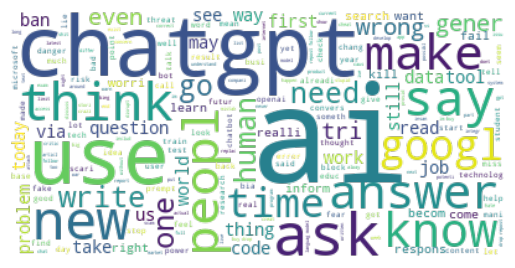

In [84]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

negative_text = chatgpt_tweets_df[chatgpt_tweets_df['sentiment'] == 'Negative']['stemmed'].apply(
    lambda x: ' '.join(x)
).tolist()

wordcloud = WordCloud(background_color='rgba(0, 0, 0, 0)', mode='RGBA').generate(' '.join(negative_text))

# Create a figure and axes for the word cloud
fig, ax = plt.subplots()

# Display the word cloud using matplotlib
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')

wordcloud_image_path = 'reports/negative_wordcloud.png'
plt.savefig(wordcloud_image_path, format='png', transparent=True)

# Show the plot
plt.show()

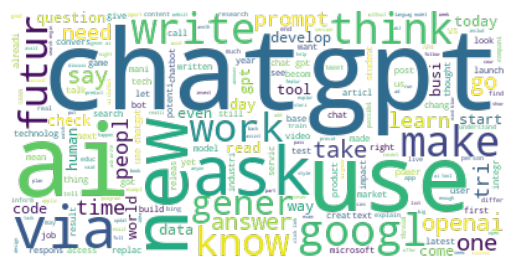

In [85]:
from wordcloud import WordCloud

neutral_text = chatgpt_tweets_df[chatgpt_tweets_df['sentiment'] == 'Neutral']['stemmed'].apply(
    lambda x: ' '.join(x)
).tolist()

wordcloud = WordCloud(background_color='rgba(0, 0, 0, 0)', mode='RGBA').generate(' '.join(neutral_text))

# Create a figure and axes for the word cloud
fig, ax = plt.subplots()

# Display the word cloud using matplotlib
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')

wordcloud_image_path = 'reports/neutral_wordcloud.png'
plt.savefig(wordcloud_image_path, format='png', transparent=True)

# Show the plot
plt.show()

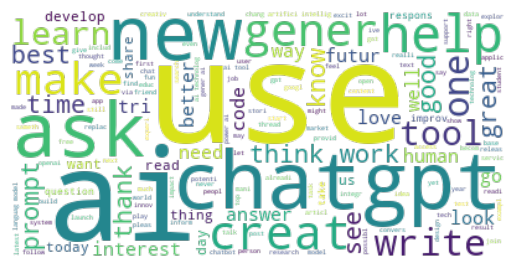

In [86]:
from wordcloud import WordCloud

positive_text = chatgpt_tweets_df[chatgpt_tweets_df['sentiment'] == 'Positive']['stemmed'].apply(
    lambda x: ' '.join(x)
).tolist()

wordcloud = WordCloud(background_color='rgba(0, 0, 0, 0)', mode='RGBA').generate(' '.join(positive_text))

# Create a figure and axes for the word cloud
fig, ax = plt.subplots()

# Display the word cloud using matplotlib
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')

wordcloud_image_path = 'reports/positive_wordcloud.png'
plt.savefig(wordcloud_image_path, format='png', transparent=True)

# Show the plot
plt.show()

In [87]:
# Save model
import joblib

rf_name = 'saved_model/random_forest.sav'
joblib.dump(rf, rf_name)

lgbm_name = 'saved_model/lightgbm.sav'
joblib.dump(lgbm, lgbm_name)

rf_hyp_name = 'saved_model/random_forest_hyperparameter.sav'
joblib.dump(rf_hyp, rf_hyp_name)

lgbm_hyp_name = 'saved_model/lightgbm_hyperparameter.sav'
joblib.dump(lgbm_hyp, lgbm_hyp_name)

['saved_model/lightgbm_hyperparameter.sav']